Database from Kaggle:
https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

Exploratory Data Analysis of Aviation Accident Database has been prepared. The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters.

The aim of the analysis is to get the knowledge / understand how to improve the quality and safety of travelling by airplane 
and predict the probability of dying in plane crash  (modelling of death ratio).

Conclusions:

-Most accidents occur in the summer, with the peak in July.  
-Accidents are more likely during good weather conditions (visual meteorological conditions).  
-Certain regions in the United States, such as California, Alaska, Florida, and Texas, exhibit an increased probability of accidents.  
-Specific airplane makes are more frequently involved in crashes.  
-The takeoff and landing phases pose the highest risk during a flight.  
-Over 50% of accidents happen during personal flights.  


Recommendations:  

Considering the above findings, it is advisable to strengthen safety regulations and procedures, especially focusing on protocols for good weather conditions. Initiatives such as training programs, awareness campaigns, and the promotion of responsible flying can contribute to reducing risky behavior, thereby lowering accident rates.

Moreover, the higher accident rates in mentioned states underscore the importance of reviewing safety regulations at airports within those regions.

Given that a significant number of accidents occur during personal flights, a re-evaluation of the pilot's licensing process is warranted.

Additionally, a more in-depth analysis of specific makes and models of airplanes, incorporating detailed technical data, would provide a comprehensive understanding of their impact on accident rates.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, mean_absolute_percentage_error as mape, r2_score

In [2]:
aviation = pd.read_csv("AviationData.csv", encoding='latin-1', low_memory=False)


In [3]:
pd.set_option('display.max_columns', None)
aviation.shape

(88889, 31)

In [4]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
67472,20091120X82236,Accident,ERA10CA069,2009-11-17,"Plant City, FL",United States,002800N,0082928W,PCM,Plant City Airport,Non-Fatal,Substantial,Airplane,N917ZZ,PARADISE USA LLC,PARADISE P-1 SLSA LW,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,"The pilot's improper flare while landing, whic...",25-09-2020
59257,20050811X01231,Accident,ANC05FA121,2005-08-05,"Denali Park, AK",United States,63.5,-149,NaN,NaN,Fatal(2),Destroyed,NaN,N912DB,Beech,V35B,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,NaN,NaN,NaN,VMC,Climb,Probable Cause,29-08-2006
73136,20130130X44629,Accident,CEN13LA147,2013-01-28,"Gainsville, TX",United States,033396N,0971150W,GLE,Gainesville Municipal Airport,Non-Fatal,Substantial,Gyrocraft,N4844W,WEBB,WEBB 2,Yes,1.0,Reciprocating,091,NaN,Flight Test,Pilot,0.0,0.0,0.0,1.0,VMC,NaN,The pilots failure to follow his test plan an...,25-09-2020
79724,20170405X64616,Accident,GAA17CA217,2017-04-05,"Cedar City, UT",United States,037427N,0113553W,CDC,CEDAR CITY RGNL,Non-Fatal,Substantial,Airplane,N81173,FUNK,B85C,No,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,VMC,NaN,The pilots failure to maintain directional co...,25-09-2020
57231,20040816X01224,Accident,FTW04LA212,2004-08-07,"DE LEON, TX",United States,32.215278,-98.177778,NaN,NaN,Non-Fatal,Substantial,NaN,N78616,Enstrom,F-28F,No,1.0,Reciprocating,NaN,NaN,Aerial Observation,NaN,NaN,NaN,2.0,1.0,VMC,Maneuvering,Probable Cause,28-12-2004
54493,20030422X00542,Accident,ANC03LA045,2003-04-18,"DILLINGHAM, AK",United States,58.333333,-158.5,NaN,NaN,Non-Fatal,Substantial,NaN,N3651N,Piper,PA-12,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,NaN,NaN,NaN,2.0,VMC,Taxi,Probable Cause,25-11-2003
49951,20010123X00346,Accident,LAX01LA075B,2001-01-15,"SAN LUIS OBISPO, CA",United States,NaN,NaN,SBP,SAN LUIS OBISPO COUNTY-MC CHES,Non-Fatal,Substantial,NaN,N890GR,Cessna,310,No,2.0,Reciprocating,NaN,NaN,Business,NaN,NaN,NaN,NaN,3.0,VMC,Standing,Probable Cause,02-01-2002
87672,20220413104936,Accident,ERA22LA188,2022-04-12,"Calhoun, GA",United States,342835N,0845557W,NaN,NaN,Minor,Substantial,Helicopter,N426DB,ROBINSON HELICOPTER COMPANY,R44 II,No,1.0,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,3.0,NaN,NaN,NaN,15-04-2022
60083,20090514X65913,Accident,CHI06LA281,2006-01-10,"HOWELL, MI",United States,NaN,NaN,OZW,Livingston County Spencer J. H,Non-Fatal,Substantial,Airplane,N99811,Univar,Ercoupe,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Landing,Probable Cause,28-07-2009
56643,20040520X00618,Accident,MIA04LA082,2004-05-12,"LAKE WORTH, FL",United States,26.6,-80.086944,LNA,Palm Beach County Park,Non-Fatal,Substantial,NaN,N551PK,Beech,K35,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,NaN,1.0,NaN,NaN,VMC,Approach,Probable Cause,24-01-2005


In [6]:
aviation.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
#creating a copy of an original dataframe
original_aviation = aviation.copy()

In [8]:
aviation.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
#listing columns that contain Nans (As there are 27 columns that are incomplete, there is a need to consider how to handle the issue.)
missing_data_col = aviation.columns[aviation.isna().any()].tolist()
missing_data_col, len(missing_data_col)

(['Location',
  'Country',
  'Latitude',
  'Longitude',
  'Airport.Code',
  'Airport.Name',
  'Injury.Severity',
  'Aircraft.damage',
  'Aircraft.Category',
  'Registration.Number',
  'Make',
  'Model',
  'Amateur.Built',
  'Number.of.Engines',
  'Engine.Type',
  'FAR.Description',
  'Schedule',
  'Purpose.of.flight',
  'Air.carrier',
  'Total.Fatal.Injuries',
  'Total.Serious.Injuries',
  'Total.Minor.Injuries',
  'Total.Uninjured',
  'Weather.Condition',
  'Broad.phase.of.flight',
  'Report.Status',
  'Publication.Date'],
 27)

In [10]:
#creating a function removing columns with missing data above established threshold and listing the removed columns

def drop_columns(df, thr = 0.5):
    missing_percentages = df.isna().mean()
    col_to_drop = missing_percentages[missing_percentages > thr].index
    new_df=df.drop(columns = col_to_drop)
    return new_df, list(col_to_drop)
    
    

In [11]:
# There are 6 columns to be removed when threshold 0.5 is applied.
dropped_col_df, dropped_columns = drop_columns(aviation, 0.5)
dropped_columns

['Latitude',
 'Longitude',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [12]:
# There are 8 columns to be removed when threshold 0.4 is applied/
dropped_col_df, dropped_columns = drop_columns(aviation, 0.4)
dropped_columns

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [13]:
#I decide to perform an analysis applying the threshold 0.4.

dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [14]:
#  checking the number of missing values


from tabulate import tabulate

def check_missing_values(df):
    pd.set_option('display.max_rows', None)
    print("The number of missing values in each column:")
    table_data = []
    for column in df.columns:
        missing_count = df[column].isna().sum()
        table_data.append([column, missing_count])

    print(tabulate(table_data, headers = ["Column", "No. of missing values"], tablefmt = "grid"))

    pd.reset_option('display.max_rows', None)

In [15]:
check_missing_values(dropped_col_df)

The number of missing values in each column:
+------------------------+-------------------------+
| Column                 |   No. of missing values |
+========================+=========================+
| Event.Id               |                       0 |
+------------------------+-------------------------+
| Investigation.Type     |                       0 |
+------------------------+-------------------------+
| Accident.Number        |                       0 |
+------------------------+-------------------------+
| Event.Date             |                       0 |
+------------------------+-------------------------+
| Location               |                      52 |
+------------------------+-------------------------+
| Country                |                     226 |
+------------------------+-------------------------+
| Injury.Severity        |                    1000 |
+------------------------+-------------------------+
| Aircraft.damage        |                    3194 |
+

In [16]:
#changing date (presented as string) to date format 
dropped_col_df["Event.Date"] = pd.to_datetime(dropped_col_df["Event.Date"])

In [17]:
# While analyzing outliers I discovered there were two accidents with the same date and the number of fatalities. It turned out these two planes crashed with each other. Data has been entered incorrectly - 349 is the total number of fatalities in both planes.
dropped_col_df.sort_values(by="Total.Fatal.Injuries", ascending=False).head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,NaN,Tupolev,TU-154,No,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,NaN,Boeing,747-168,No,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002


In [18]:
#the DataFrame without any nans (all the missing values have been removed)

# dropped_col_df = dropped_col_df.dropna()
dropped_col_df["Year"] = dropped_col_df["Event.Date"].dt.year
dropped_col_df["Month"] = dropped_col_df["Event.Date"].dt.month
dropped_col_df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8


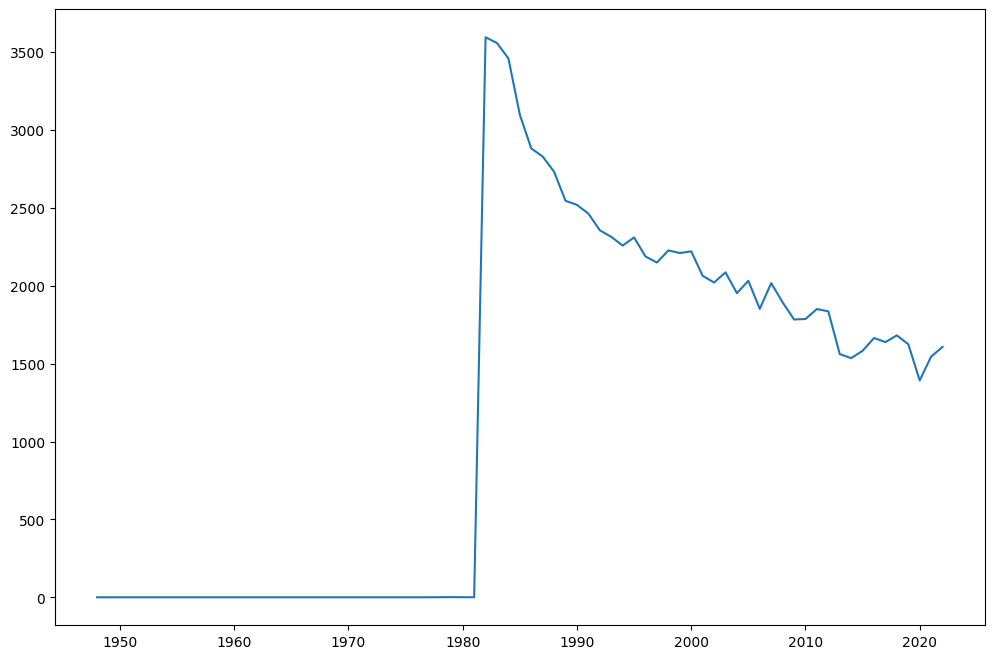

In [19]:
#data visualisation

accidents_by_year = dropped_col_df["Year"].value_counts().sort_index()


plt.figure(figsize=(12,8))
plt.plot(accidents_by_year.index, accidents_by_year.values)

In [20]:
dropped_col_df[dropped_col_df["Year"] < 1982]

#As there are only 3 records between 1962 and 1981, I will ilustrate the trend in accidents' number excluding these records.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979,9
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981,8


In [21]:
original_aviation["Event.Date"] = pd.to_datetime(original_aviation["Event.Date"])
original_aviation["Year"] = original_aviation["Event.Date"].dt.year
original_aviation_1982 = original_aviation[original_aviation["Year"] >=1982]
accidents_by_year_original = original_aviation["Year"].value_counts().sort_index()
accidents_by_year_1982 = original_aviation_1982["Year"].value_counts().sort_index()

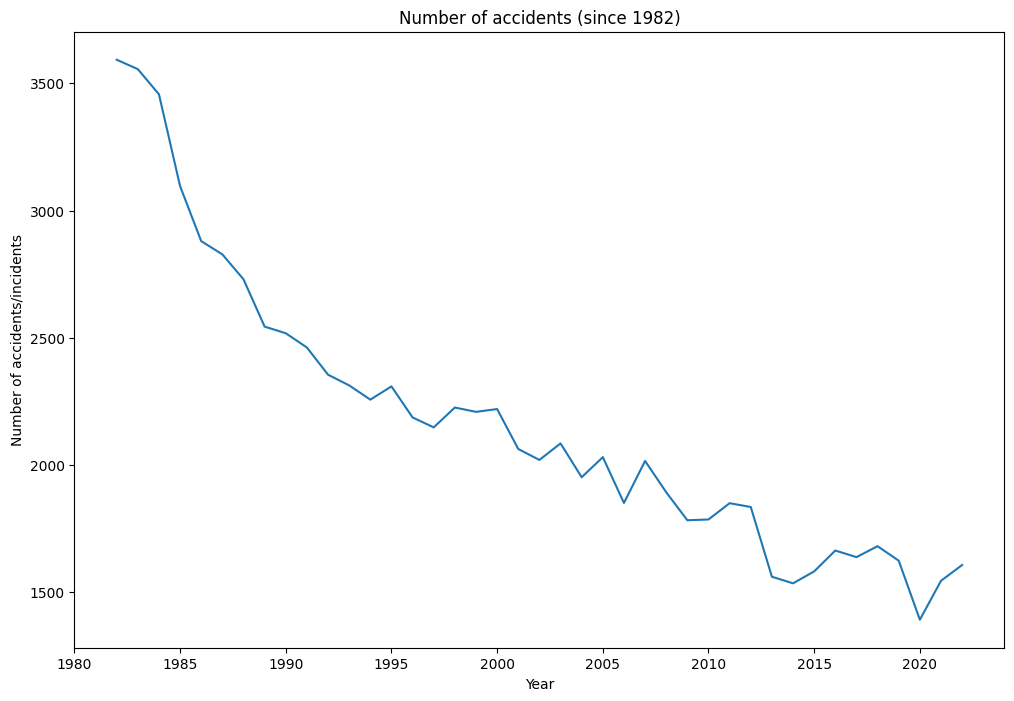

In [22]:
plt.figure(figsize=(12,8))
plt.plot(accidents_by_year_1982.index, accidents_by_year_1982.values)
plt.xlabel("Year")
plt.ylabel("Number of accidents/incidents")
plt.title("Number of accidents (since 1982)")
plt.show()

In [23]:
#creating dataframe of crashes that occurred in the area of the United States
df_usa = dropped_col_df[dropped_col_df["Country"] == "United States"]

In [24]:
import us

all_states = us.states.STATES

for state in all_states:
    print(state)


state_abbr = [state.abbr for state in all_states]

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [25]:
#adding a column with a particular state of USA
df_usa["State"] = df_usa["Location"].str[-2:]
df_usa

/tmp/ipykernel_32926/66544778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["State"] = df_usa["Location"].str[-2:]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7,CA
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,VA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,CA
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,12,MD
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,NH
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,12,AZ
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,UT


In [26]:
# A heatmap visualising the distribution of aviation accidents around the US
state_counts = df_usa['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']

import plotly.express as px
fig = px.choropleth(
    state_counts,
    locations="State",
    locationmode="USA-states",
    color="Count",
    scope="usa",
    title="Distribution of accidents in USA",
    color_continuous_scale= 'Blues',
)
fig.update_layout(
    title=dict(
        x=0.5, 
        y=0.85,  
        xanchor='center',  
        yanchor='top'  
    ),
      legend=dict(
        x=0.3,  
        y=1.02,  
        xanchor='left',  
        yanchor='bottom'  
    )
)

fig.show()

In [27]:
#creating dictionary of seasons

seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}

dropped_col_df["Season"] = dropped_col_df["Month"].map(seasons)

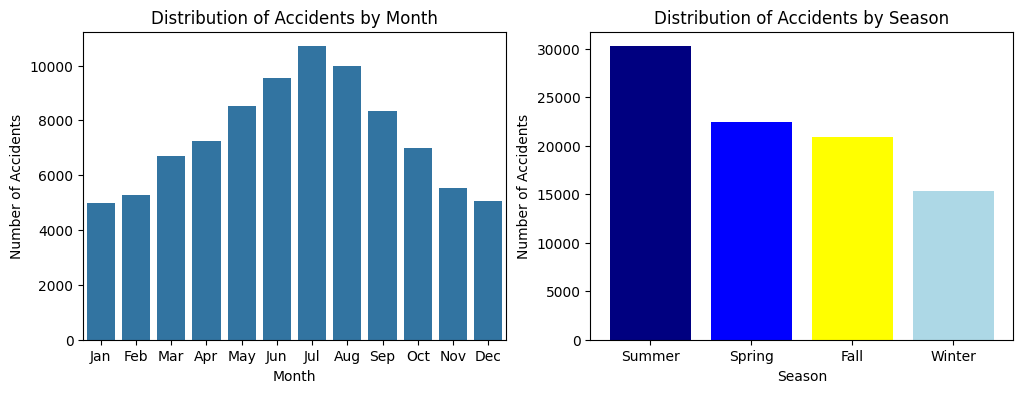

In [28]:
# Plot distribution of accidents by months and seasons

fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.countplot(data=dropped_col_df, x='Month', ax=axes[0])
axes[0].set_title('Distribution of Accidents by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Accidents')
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0].set_xticks(range(12))
axes[0].set_xticklabels(month_order)


season_colors = {
    'Winter': 'lightblue',
    'Spring': 'blue',
    'Summer': 'navy',
    'Fall': 'yellow'
}


seasonal_accident_counts = dropped_col_df['Season'].value_counts()


axes[1].bar(seasonal_accident_counts.index, seasonal_accident_counts, color=[season_colors.get(season, 'blue') for season in seasonal_accident_counts.index])
axes[1].set_title('Distribution of Accidents by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Accidents')
plt.show()

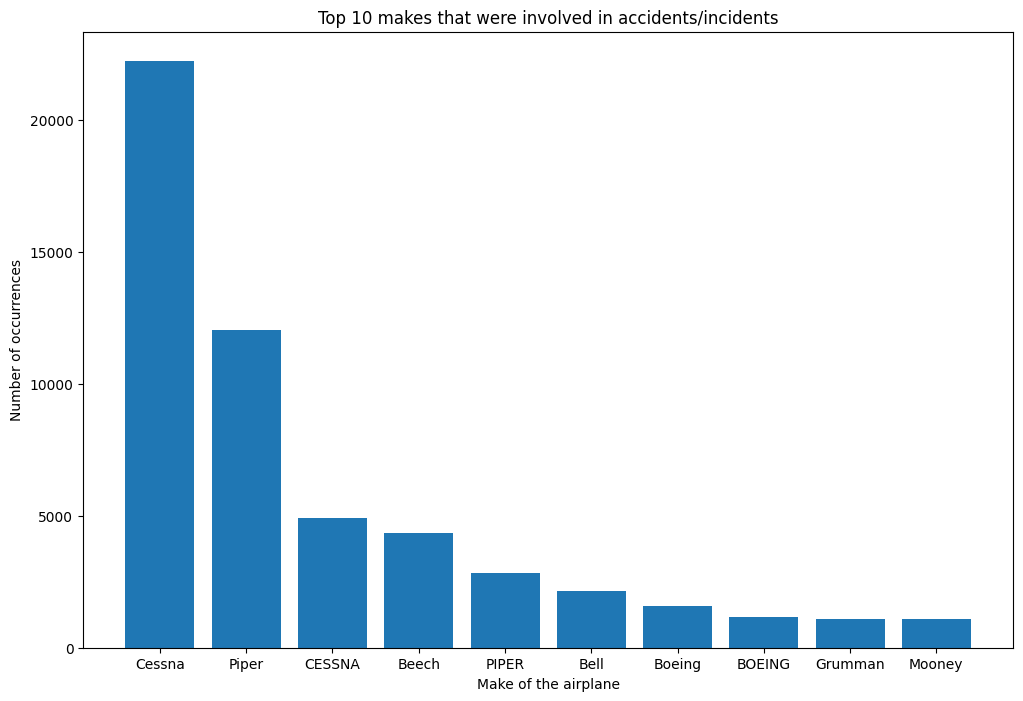

In [29]:
#visualising top 10 Makes 

top_10_makes = dropped_col_df["Make"].value_counts().head(10)

# cmap = cm.get_cmap('Blues', len(top_10_makes))

plt.figure(figsize=(12,8))
plt.bar(top_10_makes.index, top_10_makes.values)

plt.xlabel("Make of the airplane")
plt.ylabel("Number of occurrences")
plt.title("Top 10 makes that were involved in accidents/incidents")
plt.show()



In [30]:
dropped_col_df["Broad.phase.of.flight"].value_counts()


Broad.phase.of.flight
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [31]:
#landing - percentage of accidents


landing = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Landing"]

len(landing) / len(dropped_col_df)

0.1735647830440212

In [32]:
#takeoff - percentage of accidents


takeoff = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Takeoff"]

len(takeoff) / len(dropped_col_df)

0.1405460743174071

In [33]:
#cruise - percentage of accidents


cruise = dropped_col_df[dropped_col_df["Broad.phase.of.flight"] =="Cruise"]

len(cruise) / len(dropped_col_df)

0.115526105592368

In [34]:
#personal fligths' percentage

personal = dropped_col_df[dropped_col_df["Purpose.of.flight"] == 'Personal']

len(personal) / len(dropped_col_df)


0.5562893046383692

In [35]:
#instructional fligths' percentage

instructional = dropped_col_df[dropped_col_df["Purpose.of.flight"] == 'Instructional']

len(instructional) / len(dropped_col_df)


0.11926110092362384

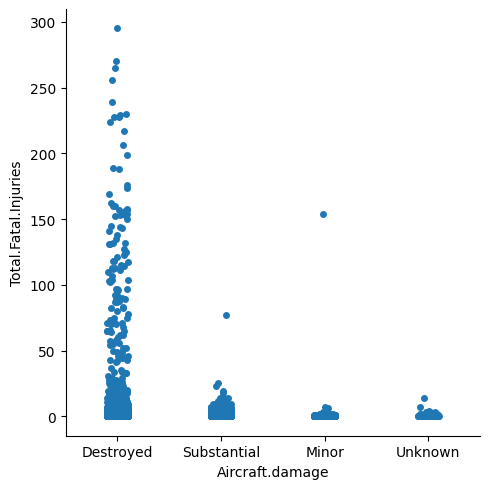

In [36]:
sns.catplot(x='Aircraft.damage',y='Total.Fatal.Injuries',data=dropped_col_df);


In [37]:
# analyzing the total fatal injuries

dropped_col_df["Total.Fatal.Injuries"].describe()

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

In [38]:
percentile_99 = np.percentile(dropped_col_df["Total.Fatal.Injuries"], 99)
percentile_99

# In 99% of records the number of casualties is 4 or fewer.

nan

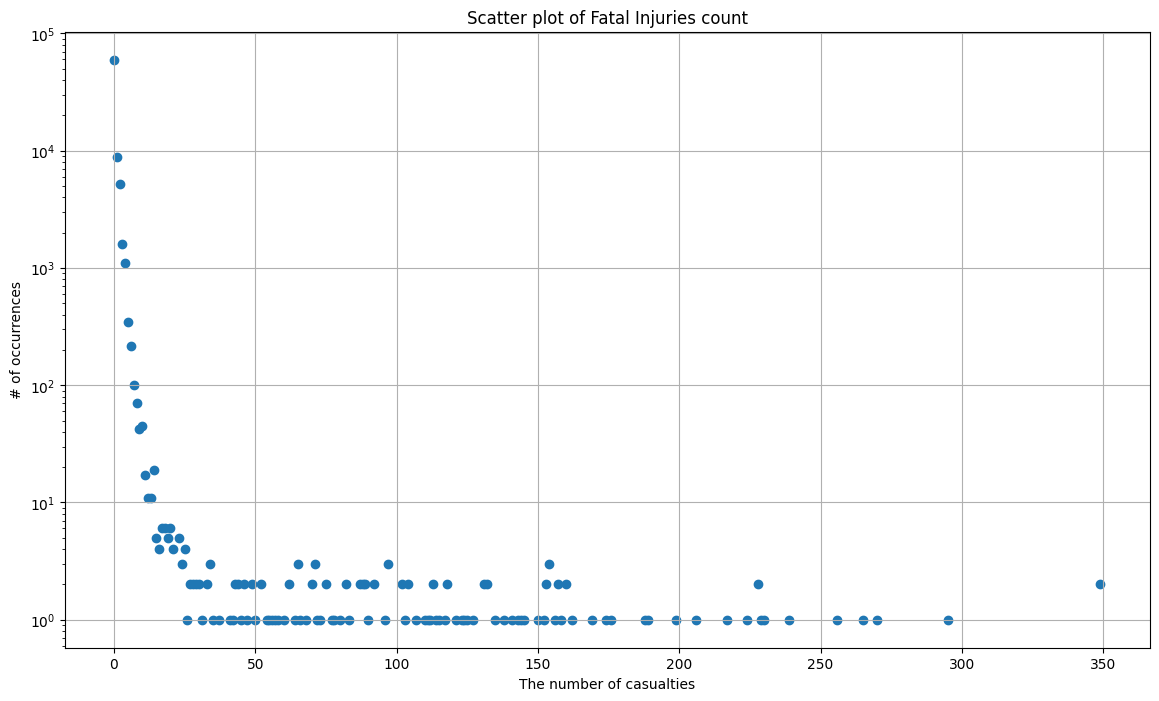

In [39]:
#creating scatter plot to make data more readable / easily visible

counts_fatal = dropped_col_df["Total.Fatal.Injuries"].value_counts()

plt.figure(figsize=(14,8))
plt.scatter(counts_fatal.index, counts_fatal)
plt.yscale("log")
plt.xlabel("The number of casualties")
plt.ylabel("# of occurrences")
plt.title("Scatter plot of Fatal Injuries count")
plt.grid()
plt.show()

In [40]:

dropped_col_df["Death.Ratio"] =  dropped_col_df["Total.Fatal.Injuries"]/(dropped_col_df["Total.Fatal.Injuries"] + dropped_col_df["Total.Serious.Injuries"]+ dropped_col_df["Total.Minor.Injuries"]+ dropped_col_df["Total.Uninjured"])

In [41]:

# Data preprocessing - Pipeline - imputing missing data (for numeric values imputing a mean, for categorical ones imputing the most frequent 
# preparing data for modelling



numeric_features = ["Number.of.Engines"]
categorical_features = ["Investigation.Type", "Aircraft.damage", "Amateur.Built",  "Engine.Type", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight"]

numeric_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="mean")), ('scaling', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="most_frequent")), ('onehot', OneHotEncoder(sparse_output=False))])


transformer = ColumnTransformer(transformers= [('num', numeric_pipeline, numeric_features),
                                               ('cat', categorical_pipeline, categorical_features)],
                                               
                                              )

transformed_data = pd.DataFrame(transformer.fit_transform(dropped_col_df), columns = transformer.get_feature_names_out())

In [42]:
dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Season,Death.Ratio
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10,Fall,1.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7,Summer,1.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,Summer,NaN
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,Summer,1.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8,Summer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,12,Winter,0.0
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,Winter,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,12,Winter,0.0
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,Winter,NaN


In [43]:
# Data preprocessing - Pipeline - imputing missing data (for numeric values imputing a mean, for categorical ones imputing the most frequent 
# preparing data for modelling



numeric_features = ["Number.of.Engines", "Total.Serious.Injuries","Total.Minor.Injuries",
            "Total.Uninjured"]
categorical_features = ["Investigation.Type", "Aircraft.damage", "Amateur.Built",  "Engine.Type", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight", "Engine.Type"]

numeric_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="mean")), ('scaling', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="most_frequent")), ('onehot', OneHotEncoder(sparse_output=False))])


transformer = ColumnTransformer(transformers= [('num', numeric_pipeline, numeric_features),
                                               ('cat', categorical_pipeline, categorical_features)],
                                               
                                              )

transformed_data = pd.DataFrame(transformer.fit_transform(dropped_col_df), columns = transformer.get_feature_names_out())

In [44]:
#checkin the shape of a newly created DataFrame
transformed_data.shape

(88889, 78)

In [45]:
#checking Nans - no missing values in DF
transformed_data.isna().any().any()

False

In [46]:
# correlation matrix of analyzed data
transformed_data.corr()

,num__Number.of.Engines,num__Total.Serious.Injuries,num__Total.Minor.Injuries,num__Total.Uninjured,cat__Investigation.Type_Accident,cat__Investigation.Type_Incident,cat__Aircraft.damage_Destroyed,cat__Aircraft.damage_Minor,cat__Aircraft.damage_Substantial,cat__Aircraft.damage_Unknown,cat__Amateur.Built_No,cat__Amateur.Built_Yes,cat__Engine.Type_Electric,cat__Engine.Type_Geared Turbofan,cat__Engine.Type_Hybrid Rocket,cat__Engine.Type_LR,cat__Engine.Type_NONE,cat__Engine.Type_Reciprocating,cat__Engine.Type_Turbo Fan,cat__Engine.Type_Turbo Jet,cat__Engine.Type_Turbo Prop,cat__Engine.Type_Turbo Shaft,cat__Engine.Type_UNK,cat__Engine.Type_Unknown,cat__Purpose.of.flight_ASHO,cat__Purpose.of.flight_Aerial Application,cat__Purpose.of.flight_Aerial Observation,cat__Purpose.of.flight_Air Drop,cat__Purpose.of.flight_Air Race show,cat__Purpose.of.flight_Air Race/show,cat__Purpose.of.flight_Banner Tow,cat__Purpose.of.flight_Business,cat__Purpose.of.flight_Executive/corporate,cat__Purpose.of.flight_External Load,cat__Purpose.of.flight_Ferry,cat__Purpose.of.flight_Firefighting,cat__Purpose.of.flight_Flight Test,cat__Purpose.of.flight_Glider Tow,cat__Purpose.of.flight_Instructional,cat__Purpose.of.flight_Other Work Use,cat__Purpose.of.flight_PUBL,cat__Purpose.of.flight_PUBS,cat__Purpose.of.flight_Personal,cat__Purpose.of.flight_Positioning,cat__Purpose.of.flight_Public Aircraft,cat__Purpose.of.flight_Public Aircraft - Federal,cat__Purpose.of.flight_Public Aircraft - Local,cat__Purpose.of.flight_Public Aircraft - State,cat__Purpose.of.flight_Skydiving,cat__Purpose.of.flight_Unknown,cat__Weather.Condition_IMC,cat__Weather.Condition_UNK,cat__Weather.Condition_Unk,cat__Weather.Condition_VMC,cat__Broad.phase.of.flight_Approach,cat__Broad.phase.of.flight_Climb,cat__Broad.phase.of.flight_Cruise,cat__Broad.phase.of.flight_Descent,cat__Broad.phase.of.flight_Go-around,cat__Broad.phase.of.flight_Landing,cat__Broad.phase.of.flight_Maneuvering,cat__Broad.phase.of.flight_Other,cat__Broad.phase.of.flight_Standing,cat__Broad.phase.of.flight_Takeoff,cat__Broad.phase.of.flight_Taxi,cat__Broad.phase.of.flight_Unknown,cat__Engine.Type_Electric,cat__Engine.Type_Geared Turbofan,cat__Engine.Type_Hybrid Rocket,cat__Engine.Type_LR,cat__Engine.Type_NONE,cat__Engine.Type_Reciprocating,cat__Engine.Type_Turbo Fan,cat__Engine.Type_Turbo Jet,cat__Engine.Type_Turbo Prop,cat__Engine.Type_Turbo Shaft,cat__Engine.Type_UNK,cat__Engine.Type_Unknown
num__Number.of.Engines,1.000000,0.032357,0.054979,0.352261,-0.310535,0.310535,0.027689,0.227289,-0.118896,-0.001386,0.104789,-0.104789,0.036495,0.021093,-0.001141,0.075434,-0.012620,-0.322038,0.451849,0.204268,0.195348,-0.001004,-0.001141,-0.130606,0.006738,-0.076315,-0.024580,-0.000405,-0.017004,-0.016429,-0.011245,0.062799,0.121906,-0.006305,0.037304,0.015841,0.012736,-0.018218,-0.077407,-0.020219,-0.001141,0.001610,-0.135188,0.090967,-0.006143,0.008194,-0.003217,-0.001202,0.004651,0.281544,0.138540,0.020985,0.026357,-0.140856,0.033193,0.049942,0.006036,0.028095,-0.001682,-0.029157,-0.074550,-0.000507,0.060497,-0.011161,0.080320,0.000851,0.036495,0.021093,-0.001141,0.075434,-0.012620,-0.322038,0.451849,0.204268,0.195348,-0.001004,-0.001141,-0.130606
num__Total.Serious.Injuries,0.032357,1.000000,0.220255,0.045976,0.022990,-0.022990,0.046455,-0.006041,-0.041334,-0.003720,0.001776,-0.001776,-0.001333,-0.002272,-0.000656,0.033870,-0.000928,-0.051038,0.060644,0.006338,-0.003837,0.014638,-0.000656,0.031871,-0.000650,-0.020031,0.010175,0.001244,-0.002759,0.004786,0.001943,-0.004672,0.000781,-0.000412,-0.007811,-0.001303,0.001162,-0.000513,-0.023596,0.008142,-0.000656,-0.001312,0.011172,-0.006966,0.002854,0.000368,0.008167,0.003272,0.009274,0.023592,0.022469,-0.001458,0.008362,-0.021910,0.012028,0.006594,-0.005067,0.001984,0.004947,-0.004642,0.000499,-0.003222,0.002897,0.005101,-0.017018,-0.008674,-0.001333,-0.002272,-0.000656,0.033870,-0.000928,-0.051038,0.060644,0.006338,-0.003837,0.014638,-0.000656,0.031871
num__Total.Minor.Injuries,0.05

In [47]:
#replacing Nans in Death Ratio column with a mean

death_ratio_mean = dropped_col_df["Death.Ratio"].mean()
dropped_col_df["Death.Ratio"].fillna(death_ratio_mean, inplace=True)

In [48]:

X = transformed_data
y = dropped_col_df["Death.Ratio"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_train.shape, y_test.shape, y_test.shape

((71111, 78), (71111, 78), (17778,), (17778,))

In [49]:
# X_reg = transformed_data

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y, test_size=0.2)



In [50]:
# creating a model to predict fatal injuries 

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [51]:
coefficients = reg_model.coef_

sorted_indices = np.argsort(np.abs(coefficients))[::-1]

In [52]:
sorted_coefficients = coefficients[sorted_indices]

feature_names = transformed_data.columns

In [53]:
for idx, coef in zip(sorted_indices, sorted_coefficients):
    print(f"{feature_names[idx]}: {coef}")

cat__Engine.Type_Turbo Shaft: 4812955544952.612
cat__Engine.Type_Turbo Shaft: -3852095397054.814
cat__Engine.Type_Unknown: 3588364436688.099
cat__Engine.Type_Unknown: -2627504288790.313
cat__Investigation.Type_Accident: 2461477724284.661
cat__Investigation.Type_Incident: 2461477724284.6387
cat__Amateur.Built_No: -1821192570517.7554
cat__Amateur.Built_Yes: -1821192570517.7085
cat__Engine.Type_Turbo Jet: 1530512501410.9768
cat__Engine.Type_Turbo Prop: 1226917254622.5403
cat__Engine.Type_NONE: 1032669250251.521
cat__Engine.Type_Hybrid Rocket: 1031918188887.9661
cat__Engine.Type_UNK: 919653587075.3777
cat__Engine.Type_Turbo Fan: 889126911352.7952
cat__Engine.Type_Reciprocating: 771178603448.7144
cat__Engine.Type_LR: 744631568797.8793
cat__Engine.Type_Turbo Jet: -569652353513.1824
cat__Engine.Type_Electric: 513105483122.2698
cat__Engine.Type_Geared Turbofan: 490171762797.34753
cat__Engine.Type_Geared Turbofan: 470688385100.55634
cat__Engine.Type_Electric: 447754664775.64014
cat__Weather.Con

In [54]:
y_pred_reg = reg_model.predict(X_test)

In [55]:
#ratios mae, mape

reg_mae = mae(y_test, y_pred_reg)

reg_mse = mse(y_test, y_pred_reg)

reg_rmse = np.sqrt(reg_mse)

In [56]:
print(f"Mean squared error: {reg_mse}")
print(f"Root mean squared error: {reg_rmse}")
print(f"Mean absolute error: {reg_mae}")



Mean squared error: 5.839953380629744e+18
Root mean squared error: 2416599549.083328
Mean absolute error: 32403834.304760654


In [57]:
# r2 ratio

r2_reg = r2_score(y_test, y_pred_reg)

print(f"R2 score: {r2_reg}")

R2 score: -4.97302161455583e+19


In [58]:
# creating decision tree model to see which features are the most important in the model

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

In [59]:
#ratios mae, mape, mse, rmse for decision tree

tree_mae = mae(y_test, y_pred_tree)

tree_mape = mape(y_test, y_pred_tree)

tree_mse = mse(y_test, y_pred_tree)

tree_rmse = np.sqrt(tree_mse)

In [60]:
print(f"Mean squared error for decision tree: {tree_mse}")
print(f"Root mean squared error for decision tree: {tree_rmse}")
print(f"Mean absolute error for decision tree: {tree_mae}")
print(f"Mean absolute percentage error for decision tree: {tree_mape}")

Mean squared error for decision tree: 0.008511155865900217
Root mean squared error for decision tree: 0.09225592591210723
Mean absolute error for decision tree: 0.024213697143995534
Mean absolute percentage error for decision tree: 45097106943135.76


In [61]:
# decision tree - looking for the most important features


feature_importances = tree.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [62]:
feature_importance_df.sort_values('Importance', ascending=False).head(10)

,Feature,Importance
6,cat__Aircraft.damage_Destroyed,0.327531
1,num__Total.Serious.Injuries,0.271749
3,num__Total.Uninjured,0.177955
2,num__Total.Minor.Injuries,0.164992
5,cat__Investigation.Type_Incident,0.032358
0,num__Number.of.Engines,0.005430
59,cat__Broad.phase.of.flight_Landing,0.002740
42,cat__Purpose.of.flight_Personal,0.001514
49,cat__Purpose.of.flight_Unknown,0.001096
11,cat__Amateur.Built_Yes,0.001077


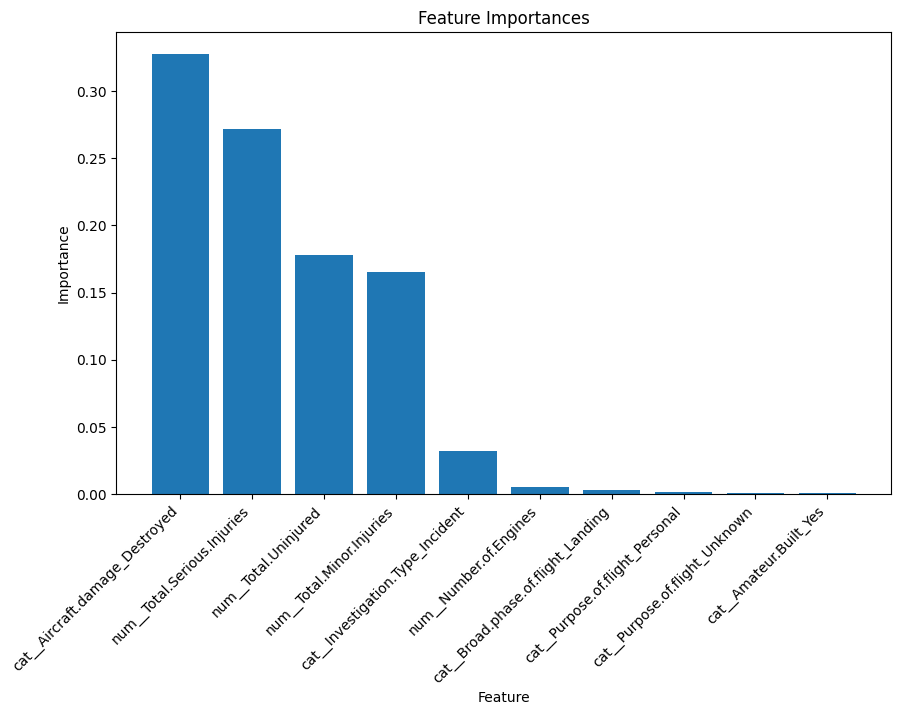

In [63]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance_df['Importance'].head(10), align='center')
plt.xticks(range(10), feature_importance_df['Feature'].head(10), rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [64]:
X_trimmed = transformed_data[['cat__Aircraft.damage_Destroyed', 'cat__Weather.Condition_VMC', 'num__Number.of.Engines', 'cat__Broad.phase.of.flight_Landing', 'cat__Purpose.of.flight_Aerial Application', 'cat__Broad.phase.of.flight_Takeoff']]

X_train_trimmed, X_test_trimmed, y_train, y_test = train_test_split(X_trimmed, y, test_size=0.2)



In [65]:
tree_trimmed = DecisionTreeRegressor(max_depth=4, min_samples_leaf=20).fit(X_train_trimmed, y_train)

y_pred_tree_trimmed = tree_trimmed.predict(X_test_trimmed)


trimmed_tree_mae = mae(y_test, y_pred_tree_trimmed)

trimmed_tree_mape = mape(y_test, y_pred_tree_trimmed)

trimmed_tree_mse = mse(y_test, y_pred_tree_trimmed)

trimmed_tree_rmse = np.sqrt(trimmed_tree_mse)






In [66]:
print(f"Mean squared error for decision tree: {trimmed_tree_mse}")
print(f"Root mean squared error for decision tree: {trimmed_tree_rmse}")
print(f"Mean absolute error for decision tree: {trimmed_tree_mae}")
print(f"Mean absolute percentage error for decision tree: {trimmed_tree_mape}")

Mean squared error for decision tree: 0.07494974987242757
Root mean squared error for decision tree: 0.2737695196190174
Mean absolute error for decision tree: 0.18282263781877375
Mean absolute percentage error for decision tree: 349651514463126.1


In [67]:
# r2 ratio

r2_trimmed_tree = r2_score(y_test, y_pred_tree_trimmed)

print(f"R2 score: {r2_trimmed_tree}")

R2 score: 0.34770507185317723


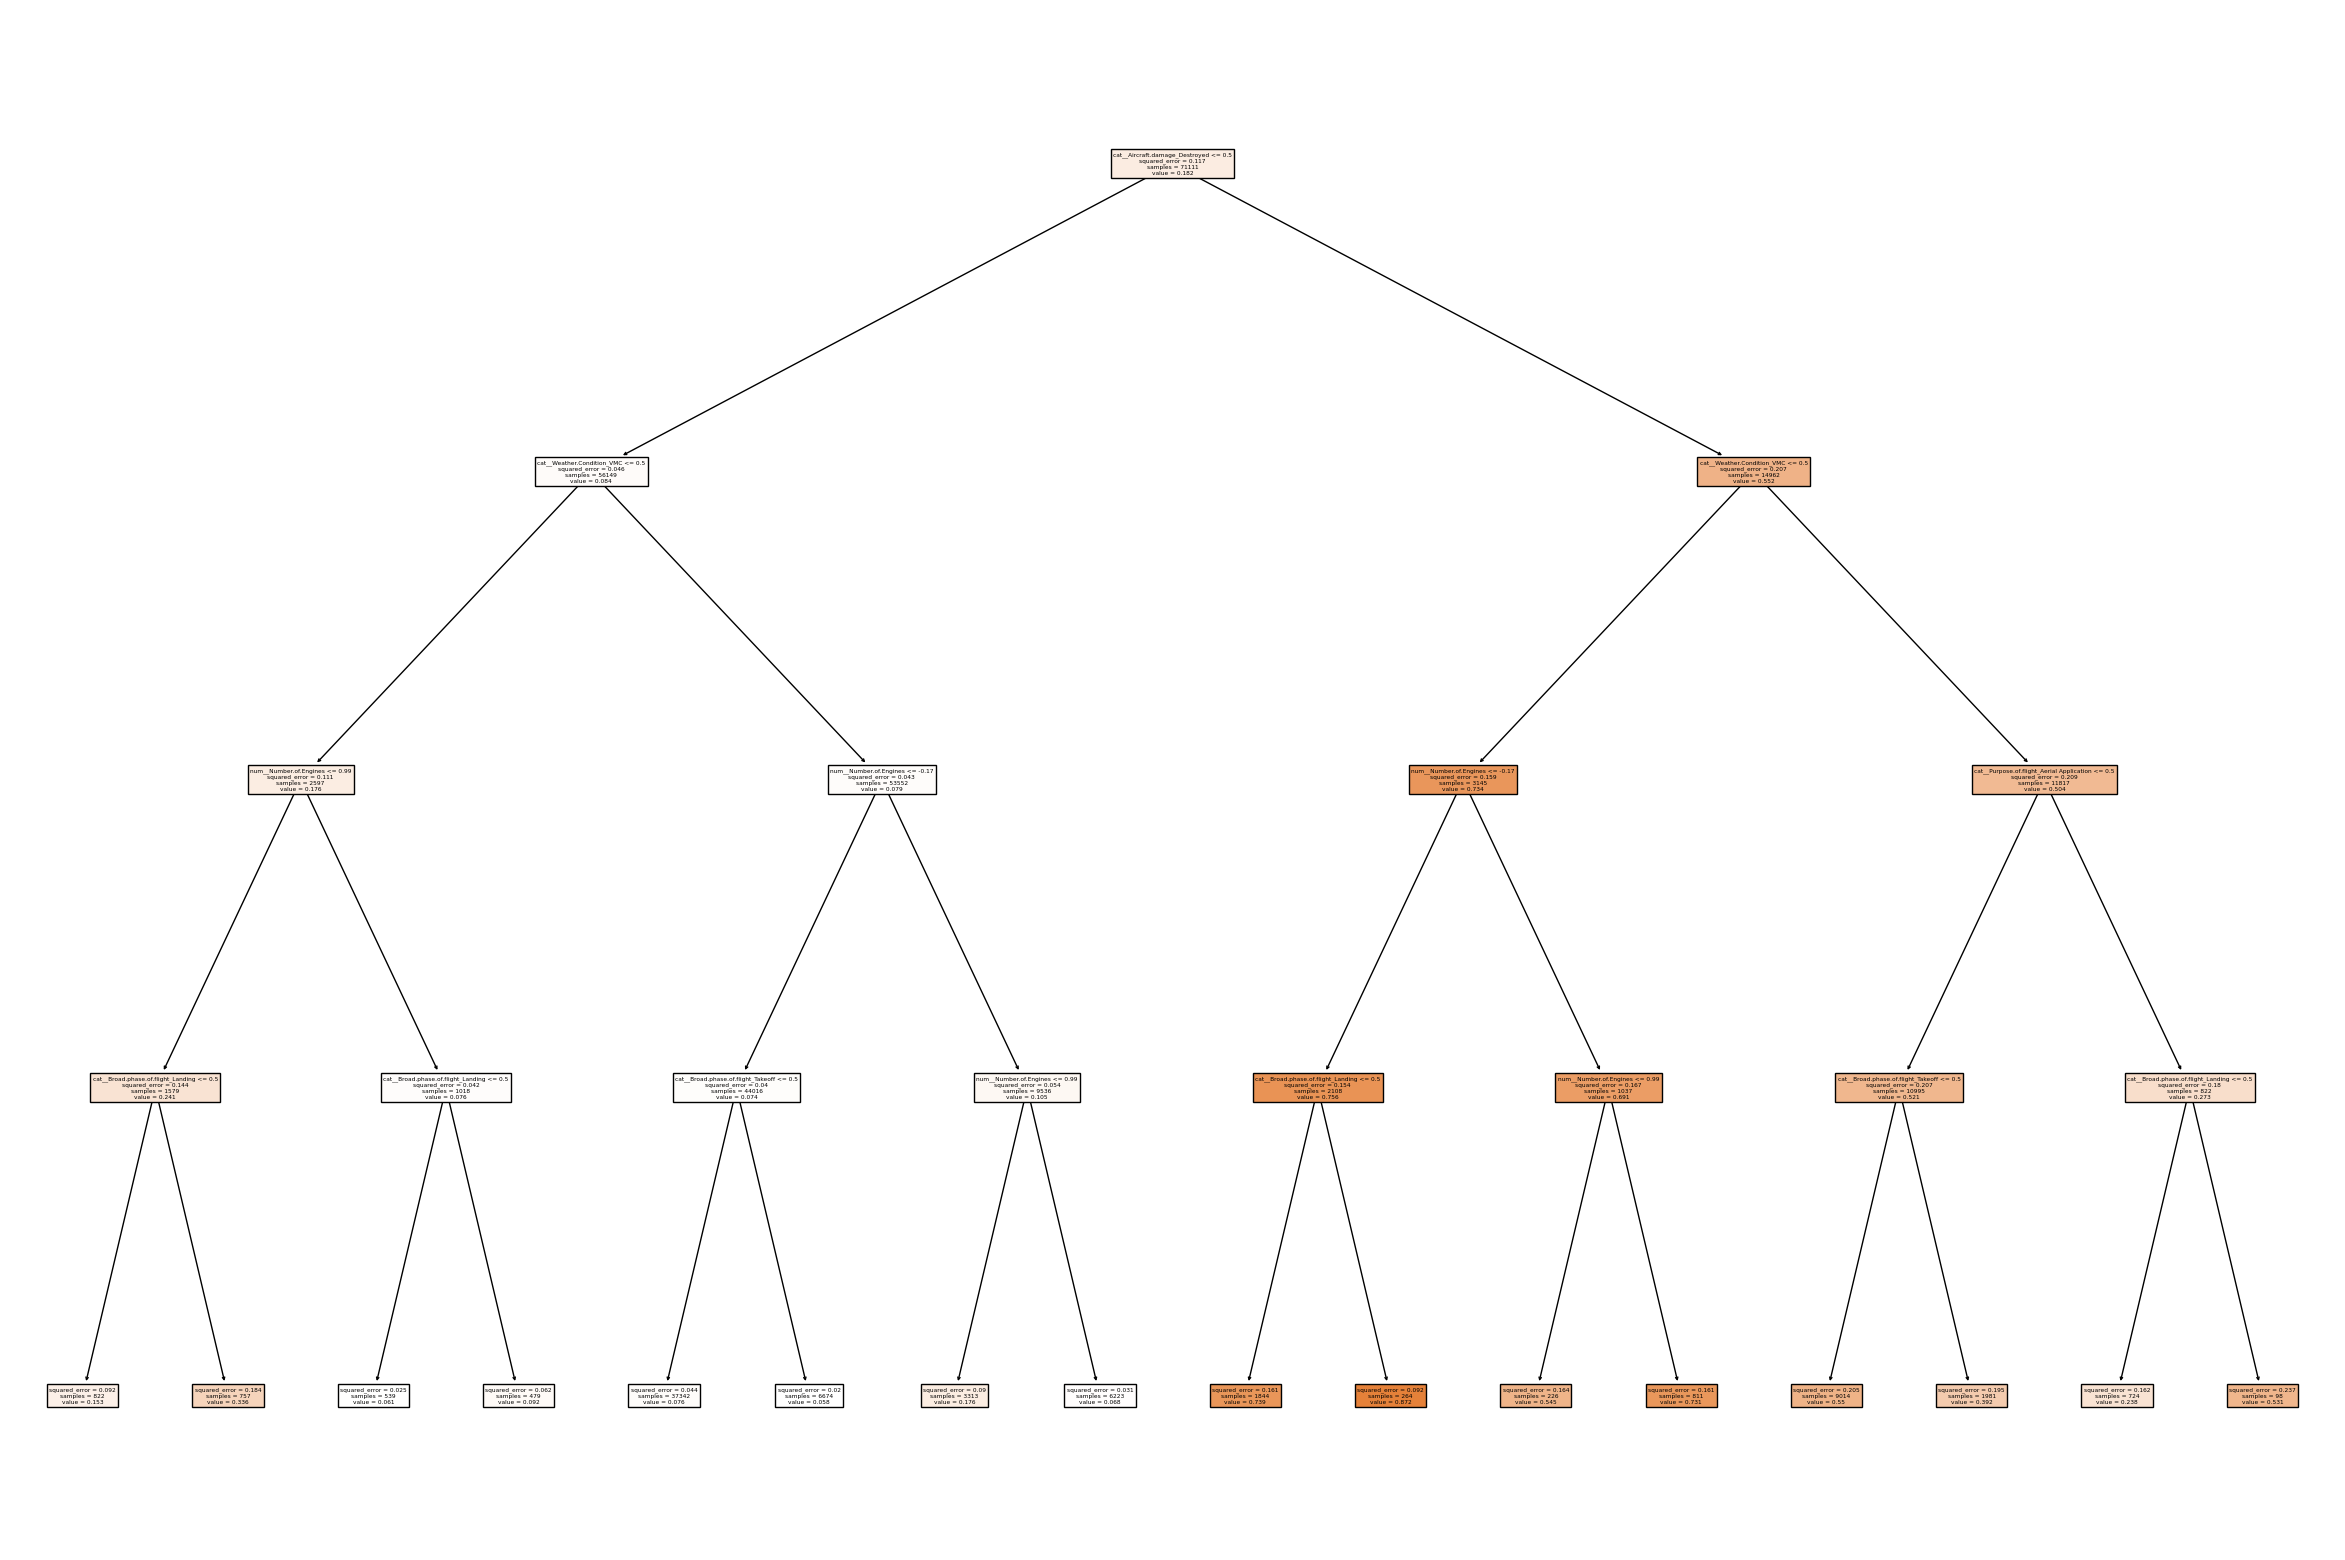

In [68]:
fea_nam = X_trimmed.columns
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(30,20))
plot_tree(tree_trimmed, feature_names = fea_nam, filled=True)


plt.show()

In [69]:
# # # random forest
# # # GridSearchCV

# rf_model = RandomForestRegressor(random_state=42)

# param_grid = {'max_depth': [2,3,4,5,6],
#                'n_estimators': [50, 100, 150],
#                'min_samples_split': [200, 300, 400, 600],
#                'min_samples_leaf': [100, 200, 300, 400]}



# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv =5,scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# print("Best Parameters: ", grid_search.best_params_)
# print("Best Mean Squared Error: ", grid_search.best_score_)


In [70]:
rf_best_param = RandomForestRegressor(max_depth=2, min_samples_leaf=400, min_samples_split=200, n_estimators=150)
rf_best_param.fit(X_train, y_train)

y_pred_rf_best_param = rf_best_param.predict(X_test)

In [71]:
rf_best_param_mae = mae(y_test, y_pred_rf_best_param)

rf_best_param_mape = mape(y_test, y_pred_rf_best_param)

rf_best_param_mse = mse(y_test, y_pred_rf_best_param)

rf_best_param_rmse = np.sqrt(rf_best_param_mse)



In [72]:
print(f"Mean squared error for random forest: {rf_best_param_mse}")
print(f"Root mean squared error for random forest: {rf_best_param_rmse}")
print(f"Mean absolute error for random forest: {rf_best_param_mae}")
print(f"Mean absolute percentage error for random forest: {rf_best_param_mape}")

Mean squared error for random forest: 0.1149193240279627
Root mean squared error for random forest: 0.3389975280558292
Mean absolute error for random forest: 0.2385936941435535
Mean absolute percentage error for random forest: 540820792225888.9


In [73]:
# r2 ratio

r2_rf_best_param = r2_score(y_test, y_pred_rf_best_param)

print(f"R2 score: {r2_rf_best_param}")

R2 score: -0.00015400100858831145


In [74]:
dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Season,Death.Ratio
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948,10,Fall,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962,7,Summer,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974,8,Summer,0.181864
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977,6,Summer,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979,8,Summer,0.181864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022,12,Winter,0.000000
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,Winter,0.181864
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022,12,Winter,0.000000
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022,12,Winter,0.181864


In [75]:
# integer encoding 
aviation['Investigation.Type'] = aviation['Investigation.Type'].astype('category').cat.codes
aviation['Aircraft.damage'] = aviation['Aircraft.damage'].astype('category').cat.codes
aviation['Aircraft.Category'] = aviation['Aircraft.Category'].astype('category').cat.codes
aviation['Engine.Type'] = aviation['Engine.Type'].astype('category').cat.codes
aviation['Purpose.of.flight'] = aviation['Purpose.of.flight'].astype('category').cat.codes
aviation['Weather.Condition'] = aviation['Weather.Condition'].astype('category').cat.codes
aviation['Broad.phase.of.flight'] = aviation['Broad.phase.of.flight'].astype('category').cat.codes

In [76]:

aviation["Death.Ratio"] =  aviation["Total.Fatal.Injuries"]/(aviation["Total.Fatal.Injuries"] + aviation["Total.Serious.Injuries"]+ aviation["Total.Minor.Injuries"]+ aviation["Total.Uninjured"])

In [77]:
aviation = aviation[aviation['Death.Ratio'].notna()]

In [78]:
aviation['Total.Uninjured'].fillna(aviation['Total.Uninjured'].mean(), inplace=True)
aviation['Total.Minor.Injuries'].fillna(aviation['Total.Minor.Injuries'].mean(), inplace=True)
aviation['Total.Serious.Injuries'].fillna(aviation['Total.Serious.Injuries'].mean(), inplace=True)
aviation['Number.of.Engines'].fillna(aviation['Number.of.Engines'].mean(), inplace=True)

In [79]:
aviation['Aircraft.Category'].fillna('Unknown',inplace=True)

aviation['Engine.Type'].fillna('Others',inplace=True)
aviation['Engine.Type'].replace(['None','Unknown'],'Others')

aviation['Purpose.of.flight'].fillna('Unknown',inplace=True)
aviation['Weather.Condition'].fillna('UNK',inplace=True)
aviation['Broad.phase.of.flight'].fillna('UNKNOWN',inplace=True)

In [80]:
# prepare pre
X_new = aviation[['Investigation.Type','Aircraft.damage','Aircraft.Category',
            'Number.of.Engines','Engine.Type','Purpose.of.flight',
            'Total.Serious.Injuries','Total.Minor.Injuries',
            'Total.Uninjured','Weather.Condition','Broad.phase.of.flight'
    ]]

y_new = aviation['Death.Ratio']


X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.25,shuffle=True)

print('Training Features Shape:', X_train_new.shape)
print('Training Labels Shape:', y_train_new.shape)
print('Testing Features Shape:', X_test_new.shape)
print('Testing Labels Shape:', y_test_new.shape)

Training Features Shape: (54957, 11)
Training Labels Shape: (54957,)
Testing Features Shape: (18319, 11)
Testing Labels Shape: (18319,)


In [81]:
reg_model_new = LinearRegression()
reg_model_new.fit(X_train_new, y_train_new)

LinearRegression()

In [82]:
print('Intercept of Regression \t: b = ', reg_model_new.intercept_)
print('Coefficients of Regression \t: a = ', reg_model_new.coef_)
print()
# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train_new.columns, reg_model_new.coef_)), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  0.6528903149310401
Coefficients of Regression 	: a =  [-0.43059644 -0.21589182  0.00897305  0.02786782 -0.0040723   0.00338129
 -0.01857471 -0.01400924 -0.00174354 -0.063673   -0.00627779]



,Predictors,Coefficients
0,Investigation.Type,-0.430596
1,Aircraft.damage,-0.215892
2,Aircraft.Category,0.008973
3,Number.of.Engines,0.027868
4,Engine.Type,-0.004072
5,Purpose.of.flight,0.003381
6,Total.Serious.Injuries,-0.018575
7,Total.Minor.Injuries,-0.014009
8,Total.Uninjured,-0.001744
9,Weather.Condition,-0.063673


In [83]:
y_pred_reg_new = reg_model_new.predict(X_test_new)

In [84]:
reg_model_new_mae = mae(y_test_new, y_pred_reg_new)



reg_model_new_mse = mse(y_test_new, y_pred_reg_new)

reg_model_new_rmse = np.sqrt(reg_model_new_mse)



In [85]:
print(f"Mean squared error for decision tree: {reg_model_new_mse}")
print(f"Root mean squared error for decision tree: {reg_model_new_rmse}")
print(f"Mean absolute error for decision tree: {reg_model_new_mae}")


Mean squared error for decision tree: 0.08890216876117152
Root mean squared error for decision tree: 0.29816466719108675
Mean absolute error for decision tree: 0.19740667583766972


In [86]:
# r2 ratio

r2_reg_lin_new = r2_score(y_test_new, y_pred_reg_new)

print(f"R2 score: {r2_reg_lin_new}")

R2 score: 0.3711571894903992


In [87]:
rf_new = RandomForestRegressor(n_estimators=100)
rf_new.fit(X_train_new, y_train_new)

y_rf_new_pred = rf_new.predict(X_test_new)

In [88]:
# r2 ratio

r2_rf_new = r2_score(y_test_new, y_rf_new_pred)

print(f"R2 score: {r2_rf_new}")

R2 score: 0.9533236430234144


In [89]:

feature_importances = rf_new.feature_importances_
feature_names = X_new.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [90]:
feature_importance_df.sort_values('Importance', ascending=False).head(10)

,Feature,Importance
6,Total.Serious.Injuries,0.369072
8,Total.Uninjured,0.358018
7,Total.Minor.Injuries,0.244123
5,Purpose.of.flight,0.007022
10,Broad.phase.of.flight,0.005913
1,Aircraft.damage,0.005850
4,Engine.Type,0.002907
9,Weather.Condition,0.002487
3,Number.of.Engines,0.002442
2,Aircraft.Category,0.002011


In [91]:
#prognozujemy fatal injuries
# robimy random forest

In [100]:
mean_y = y.mean()

y.fillna(mean_y)

0        2.0
1        4.0
2        3.0
3        2.0
4        1.0
        ... 
88884    0.0
88885    0.0
88886    0.0
88887    0.0
88888    0.0
Name: Total.Fatal.Injuries, Length: 88889, dtype: float64

In [108]:
dropped_col_df['Total.Fatal.Injuries'] = dropped_col_df["Total.Fatal.Injuries"].replace(to_replace='nan', value=mean_y)

In [ ]:
dro

In [109]:

X = transformed_data
y = dropped_col_df["Total.Fatal.Injuries"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_train.shape, y_test.shape, y_test.shape

((71111, 78), (71111, 78), (17778,), (17778,))

In [93]:
dropped_col_df["Total.Fatal.Injuries"]= dropped_col_df["Total.Fatal.Injuries"].fillna(dropped_col_df["Total.Fatal.Injuries"].mean())


In [ ]:
type

In [110]:
rf_fatal = RandomForestRegressor().fit(X_train, y_train)

# y_pred_fatal_rf = rf_fatal.predict(X_train)

In [111]:
y_pred_fatal_rf = rf_fatal.predict(X_train)

In [117]:
rf_fatal_mae = mae(y_train, y_pred_fatal_rf)



rf_fatal_mse = mse(y_train, y_pred_fatal_rf)

rf_fatal_rmse = np.sqrt(rf_fatal_mse)


In [118]:
print(f"Mean squared error for decision tree: {rf_fatal_mse}")
print(f"Root mean squared error for decision tree: {rf_fatal_rmse}")
print(f"Mean absolute error for decision tree: {rf_fatal_mae}")


Mean squared error for decision tree: 14.447362905043196
Root mean squared error for decision tree: 3.800968679829287
Mean absolute error for decision tree: 0.37261312198651736


In [119]:
# r2 ratio

r2_rf_fatal = r2_score(y_train, y_pred_fatal_rf)

print(f"R2 score: {r2_rf_fatal}")

R2 score: 0.44644047293523403


In [124]:
y_pred_rf_fatal_test = rf_fatal.predict(X_test)

rf_fatal_mae_test = mae(y_test, y_pred_rf_fatal_test)



rf_fatal_mse_test = mse(y_test, y_pred_rf_fatal_test)

rf_fatal_rmse_test = np.sqrt(rf_fatal_mse_test)

In [125]:
print(f"Mean squared error for decision tree: {rf_fatal_mse_test}")
print(f"Root mean squared error for decision tree: {rf_fatal_rmse_test}")
print(f"Mean absolute error for decision tree: {rf_fatal_mae_test}")


Mean squared error for decision tree: 23.12722015656444
Root mean squared error for decision tree: 4.809076850765066
Mean absolute error for decision tree: 0.5026322191433762


In [126]:
# r2 ratio

r2_rf_fatal_test = r2_score(y_test, y_pred_rf_fatal_test )

print(f"R2 score: {r2_rf_fatal_test}")

R2 score: 0.13640913091238083


In [127]:
import xgboost